# Import Python library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [2]:
df=pd.read_csv("location_rev.csv")
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


##### Data check 

In [3]:
df.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [4]:
# Correlation check

df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


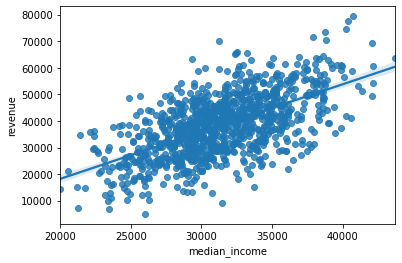

In [5]:
# Linear Plot check 

sns.regplot(data=df, x="median_income",y="revenue")
plt.show()

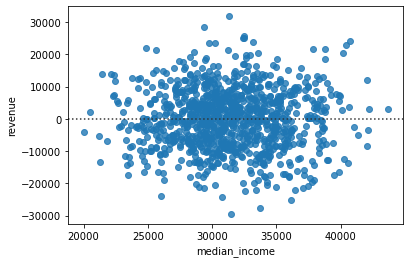

In [6]:
# Residual plot 

sns.residplot(data=df,  x="median_income",y="revenue")
plt.show()

#### Model Building Process for Simple Linear Regression

##### Train and test data split

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X=df[["median_income"]] # Input features
y=df[["revenue"]] # Target 

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25 ,random_state=1)

###### Train the model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

###### Make prediction on test dataset

In [13]:
y_pred=model.predict(X_test)
# Obtain the predicted and test data

testAccuracy=pd.DataFrame({"Actual": pd.DataFrame(y_test.values)[0].values, "Prediction":pd.DataFrame(y_pred)[0].values})
testAccuracy.head()

,Actual,Prediction
0,37487.67,38892.015116
1,32038.65,37145.108546
2,51817.62,46893.318727
3,31209.17,42094.702994
4,6874.43,24982.909382


##### Obtain intercept and slope from the model

In [14]:
intercept=model.intercept_
slope=model.coef_[0]

print(intercept,slope)

[-15376.50656292] [1.72212519]


##### Model accuracy 

- Check r^2

In [15]:
# Check R^2 for entire data
model.score(X,y)

0.3615920977224166

In [16]:
# Check R^2 for train and test data
model.score(X_train, y_train)

0.3397003165634491

In [18]:
# Check R^2 for test data
model.score(X_test,y_test)
# We can use r2_score below
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) # Return the same result

0.42753453185344525

- Check mean squared error, mean absolute error and root mean squared error

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
MSE=mean_squared_error(y_test,y_pred)
MSE

76464094.58959833

In [24]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

7068.281128440043

In [41]:
import math
RMSE=math.sqrt(MSE)
RMSE

8744.375025672121

##### model Visualization 

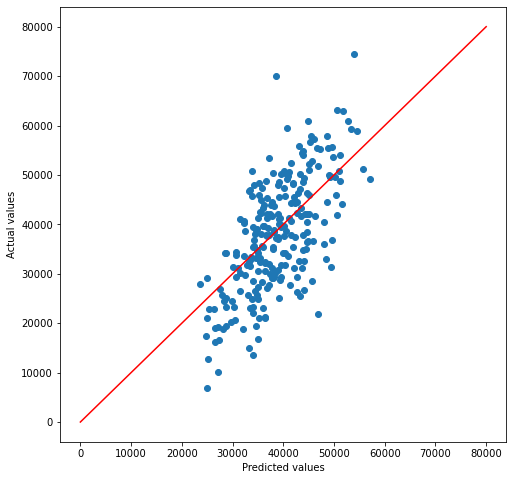

In [64]:
plt.figure(figsize=(8,8))
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.plot([0,80000],[0,80000],"k-", color="r")
plt.show()

In [69]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test,y_pred)

0.42753453185344525

## Model Procedure for Multiple Linear Regression

##### Obtain features and target variables 

In [26]:
X=df[["median_income","population_density","location_age"]]

y=df[["revenue"]]

##### Split train and test data

In [27]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=1)

##### Train the model

In [28]:
mulipltRegression=LinearRegression()

mulipltRegression.fit(X_train,y_train)

LinearRegression()

##### Make prediction

In [29]:
y_pred=mulipltRegression.predict(X_test)

##### Model Accuracy R^2

In [30]:
# Check R^2 with entire dataset

mulipltRegression.score(X,y)

0.7550454312648123

In [31]:
# Check R^2 with train data

mulipltRegression.score(X_train,y_train)

0.7535647182583112

In [32]:
# Check R^2 with test data
mulipltRegression.score(X_test,y_test)

0.7575395966796106

###### Model accuracy with MSE, AME

In [33]:
# Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
MSE

29632069.67174203

In [34]:
# Mean Absolute Error

MAE = mean_absolute_error(y_test,y_pred)
MAE

4415.009523687255

##### Model visualization

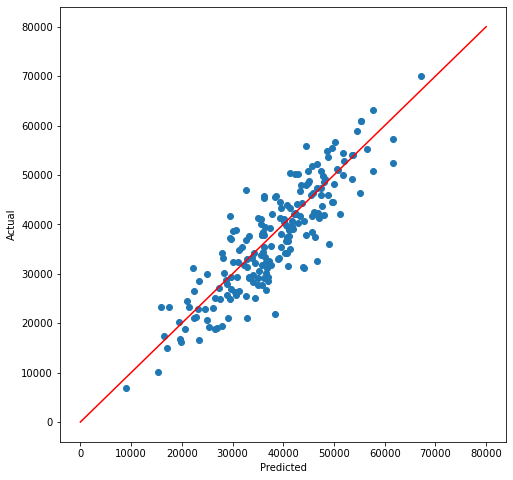

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot([0,80000],[0,80000],"k",color="red")
plt.show()

# Feature Selection for Multiple Regression

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [37]:
# Apply SelectKBest to extract best features
bestFeature=SelectKBest(score_func=f_regression,k="all")

fit=bestFeature.fit(X,y)

print(fit.scores_)

[566.92235724 107.36079765 439.12539689]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [38]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# Sorting in descending order 
featureScores.sort_values("Score", ascending = False, inplace = True)
print(featureScores)

                Specs       Score
0       median_income  566.922357
2        location_age  439.125397
1  population_density  107.360798
